<a href="https://colab.research.google.com/github/AndresMontesDeOca/Redes_Neuronales/blob/main/Clase_04/02_Eficiencia_energetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion con Multiperceptrón de Scikit-Learn
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/Fuentes/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/Data/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


### Carga del Dataset y selección de atributos numéricos

In [8]:
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# # metadata
# print(energy_efficiency.metadata)

# # variable information
# print(energy_efficiency.variables)

data = pd.concat([X, y], axis=1)
data.columns = energy_efficiency.variables['description'].values
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# # Cargar el dataset
# DATOS_DIR = '/mnt/data/'
# data = pd.read_csv(DATOS_DIR + 'nombre_del_archivo.csv')  # Reemplaza 'nombre_del_archivo.csv' con el nombre real del archivo

# # Verificar los primeros datos
# print(data.head())

# Seleccionar características relevantes y la variable objetivo
features = data[['Wall Area', 'Roof Area', 'Glazing Area']]
target = data['Cooling Load']

# Eliminar filas con valores faltantes
features = features.dropna()
target = target[features.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [17]:
# MAX_ITER = 10000
# COTA = 0.001
# ALFA = 0.001
# # cantidad de datos a procesar para actualizar pesos
# TAM_LOTE = 50

# ACTIVACION = 'relu'
# #ACTIVACION = 'tanh'
# #ACTIVATION = 'identity'

# #OPTIMIZADOR = 'lbfgs'
# OPTIMIZADOR = 'sgd'
# #OPTIMIZADOR = 'adam'

# mlpr = MLPRegressor(
#     hidden_layer_sizes=[30, 15],  # Arquitectura con tres capas ocultas
#     activation=ACTIVACION,  # Función de activación de capas ocultas.
#     solver=OPTIMIZADOR,     # Algoritmo de optimización
#     max_iter=MAX_ITER,      # Número máximo de iteraciones
#     alpha=ALFA,             # Tasa de aprendizaje.
#     random_state=None,      # Semilla para la generación de números aleatorios para reproducibilidad.
#     batch_size=TAM_LOTE,    # Tamaño del lote de datos utilizado para la actualización de pesos.
#     tol=COTA,               # Tolerancia para la convergencia de parada temprana
#     verbose=True            # Imprimir información durante el entrenamiento.
# )

# # mlpr.fit(X_train, Y_train)
# mlpr.fit(X_train_scaled, Y_train)

# print('Iteraciones realizadas: %d' % mlpr.n_iter_)

Iteration 1, loss = 286.08684327
Iteration 2, loss = 28.78033995
Iteration 3, loss = 9.42688195
Iteration 4, loss = 8.63387840
Iteration 5, loss = 8.05392113
Iteration 6, loss = 7.84750733
Iteration 7, loss = 7.75276118
Iteration 8, loss = 7.47893769
Iteration 9, loss = 7.39244432
Iteration 10, loss = 7.15876577
Iteration 11, loss = 6.63620621
Iteration 12, loss = 6.31540544
Iteration 13, loss = 5.98412329
Iteration 14, loss = 5.60066797
Iteration 15, loss = 4.86647667
Iteration 16, loss = 4.57169227
Iteration 17, loss = 4.18758745
Iteration 18, loss = 4.04777711
Iteration 19, loss = 3.95891020
Iteration 20, loss = 3.79495021
Iteration 21, loss = 3.80542301
Iteration 22, loss = 3.75905583
Iteration 23, loss = 3.63479471
Iteration 24, loss = 3.70239244
Iteration 25, loss = 3.56220882
Iteration 26, loss = 3.59183440
Iteration 27, loss = 3.58491190
Iteration 28, loss = 3.57892675
Iteration 29, loss = 3.44527875
Iteration 30, loss = 3.58050711
Iteration 31, loss = 3.38799314
Iteration 32, 

### Verificación de tipos de datos y valores nulos

### Muestra las primeras filas de los Datos

### Matriz de Correlación con Seaborn

<Axes: >

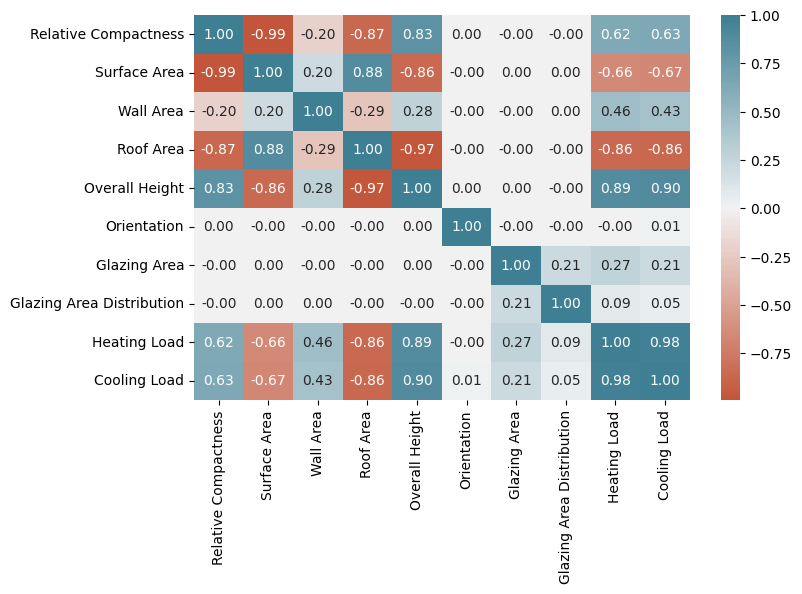

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



df = data.copy()
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt='.2f')

### Selección de atributos. Separación en entrenamiento y prueba. Normalización de valores

In [29]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [33]:
# elimina atributos redundantes
X = df.drop(columns=['Heating Load','Cooling Load', 'Relative Compactness', 'Overall Height'],axis=1)

# Y= df[['Heating Load']]
Y= df['Cooling Load']

# Separa datos en grupo de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 20)

data_scaler = StandardScaler()
# data_scaler = MinMaxScaler()

X_train = data_scaler.fit_transform(X_train)
X_test = data_scaler.transform(X_test)

### Construccion del Modelo

In [34]:
MAX_ITER = 10000
COTA = 0.001
ALFA = 0.001
# cantidad de datos a procesar para actualizar pesos
TAM_LOTE = 50

ACTIVACION = 'relu'
#ACTIVACION = 'tanh'
#ACTIVATION = 'identity'

#OPTIMIZADOR = 'lbfgs'
OPTIMIZADOR = 'sgd'
#OPTIMIZADOR = 'adam'

mlpr = MLPRegressor(
    hidden_layer_sizes=[30, 15],  # Arquitectura con tres capas ocultas
    activation=ACTIVACION,  # Función de activación de capas ocultas.
    solver=OPTIMIZADOR,     # Algoritmo de optimización
    max_iter=MAX_ITER,      # Número máximo de iteraciones
    alpha=ALFA,             # Tasa de aprendizaje.
    random_state=None,      # Semilla para la generación de números aleatorios para reproducibilidad.
    batch_size=TAM_LOTE,    # Tamaño del lote de datos utilizado para la actualización de pesos.
    tol=COTA,               # Tolerancia para la convergencia de parada temprana
    verbose=True            # Imprimir información durante el entrenamiento.
)

mlpr.fit(X_train, Y_train)

print('Iteraciones realizadas: %d' % mlpr.n_iter_)

Iteration 1, loss = 302.75688335
Iteration 2, loss = 47.41554830
Iteration 3, loss = 14.90496080
Iteration 4, loss = 11.64257969
Iteration 5, loss = 10.60476172
Iteration 6, loss = 9.91980270
Iteration 7, loss = 9.64009983
Iteration 8, loss = 9.48916149
Iteration 9, loss = 8.90710171
Iteration 10, loss = 8.65408824
Iteration 11, loss = 8.48618386
Iteration 12, loss = 8.13287259
Iteration 13, loss = 7.70043880
Iteration 14, loss = 7.29081532
Iteration 15, loss = 6.78152971
Iteration 16, loss = 6.44175615
Iteration 17, loss = 5.99505991
Iteration 18, loss = 5.68317948
Iteration 19, loss = 5.42490663
Iteration 20, loss = 5.11086783
Iteration 21, loss = 4.83238903
Iteration 22, loss = 4.59600145
Iteration 23, loss = 4.43742056
Iteration 24, loss = 4.08194610
Iteration 25, loss = 3.96102252
Iteration 26, loss = 3.90401765
Iteration 27, loss = 3.89012567
Iteration 28, loss = 3.86517195
Iteration 29, loss = 3.81134023
Iteration 30, loss = 3.76353669
Iteration 31, loss = 3.74344609
Iteration 3

In [35]:
mlpr.out_activation_ = 'identity'

### Metricas sobre el modelo

In [37]:
# Realizar predicciones
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Y_pred = mlpr.predict(X_test)

# Calcular métricas de evaluación usando las predicciones (Y_pred) y los valores reales (Y_test)
mae = mean_absolute_error(Y_test, Y_pred)  # Calcular el error absoluto medio
mse = mean_squared_error(Y_test, Y_pred)   # Calcular el error cuadrático medio
rmse = np.sqrt(mse)                        # Calcular la raíz del error cuadrático medio
r2 = r2_score(Y_test, Y_pred)              # Calcular el coeficiente de determinación

print(f"    Mean Absolute Error: {mae}")
print(f"     Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"     R-squared r2_score: {r2}")

# tambien puede calcularse R^2 con el MLPRegressor
print(f" R-squared MLPRegressor:", mlpr.score(X_test, Y_test))
# R2 (R cuadrado) es la proporción de varianza en la variable dependiente que es predecible a
# partir de las independientes en un modelo de regresión. R2=1 significa que el modelo explica el
# 100% de la variabilidad en los datos

    Mean Absolute Error: 1.4424603613073461
     Mean Squared Error: 3.6308762644135535
Root Mean Squared Error: 1.9054858342201217
     R-squared r2_score: 0.9598504008658532
 R-squared MLPRegressor: 0.9598504008658532


### Gráfico con evolución de curva de perdida

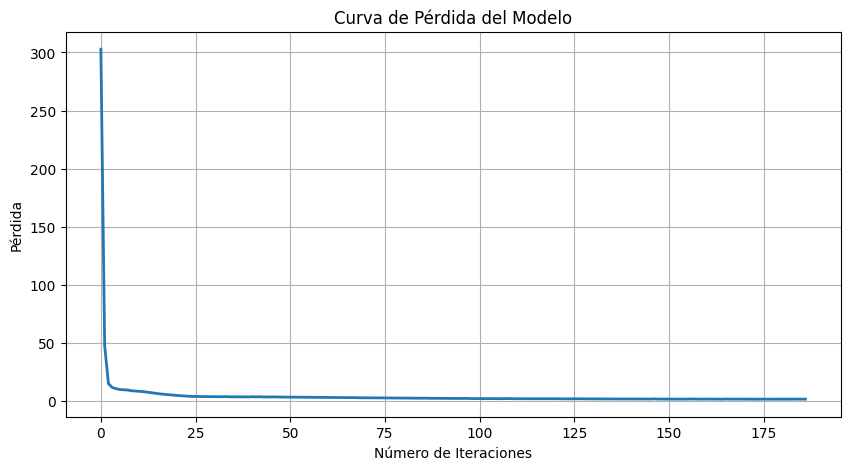

In [38]:
loss_curve = mlpr.loss_curve_  # curva de pérdida del modelo

# Dibuja curva de pérdida
plt.figure(figsize=(10, 5))
plt.plot(loss_curve, linewidth=2)
plt.title('Curva de Pérdida del Modelo')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()